## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

## 2. Loading datasets

In [2]:
# Load data into dataframe
df = pd.read_csv("/content/seattle-weather.csv", index_col= "date")
df

precipitation  temp_max  temp_min  wind  weather
date                                                        
2012-01-01            0.0      12.8       5.0   4.7  drizzle
2012-01-02           10.9      10.6       2.8   4.5     rain
2012-01-03            0.8      11.7       7.2   2.3     rain
2012-01-04           20.3      12.2       5.6   4.7     rain
2012-01-05            1.3       8.9       2.8   6.1     rain
...                   ...       ...       ...   ...      ...
2015-12-27            8.6       4.4       1.7   2.9     rain
2015-12-28            1.5       5.0       1.7   1.3     rain
2015-12-29            0.0       7.2       0.6   2.6      fog
2015-12-30            0.0       5.6      -1.0   3.4      sun
2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 5 columns]

In [3]:
# check the summary info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1461 entries, 2012-01-01 to 2015-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 68.5+ KB


In [4]:
df.describe()

precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000

In [5]:
df["2013-06-01":"2013-09-01"]

precipitation  temp_max  temp_min  wind weather
date                                                       
2013-06-01            0.0      22.8      12.2   2.5     sun
2013-06-02            1.0      20.6      12.2   3.1    rain
2013-06-03            0.0      22.2      11.1   2.9     sun
2013-06-04            0.0      26.1      12.2   3.4     sun
2013-06-05            0.0      26.7      14.4   3.1     sun
...                   ...       ...       ...   ...     ...
2013-08-28            5.6      26.7      15.6   1.3    rain
2013-08-29           19.3      23.9      18.3   3.0    rain
2013-08-30            0.0      26.1      16.1   2.9     sun
2013-08-31            0.0      27.8      13.9   2.6     sun
2013-09-01            0.0      27.8      15.6   2.5     sun

[93 rows x 5 columns]

In [6]:
df.shape

(1461, 5)

In [7]:
# Total count of data in each features
df.count()

precipitation    1461
temp_max         1461
temp_min         1461
wind             1461
weather          1461
dtype: int64

## 3. Cleaning Datasets

In [8]:
# check for missing values
df.isnull().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

There are no missing values in the datasets.

In [9]:
# check the datatypes
df.dtypes

precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [10]:
# Change datatype of date into datetime
df.index = pd.to_datetime(df.index)

In [11]:
df.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='date', length=1461, freq=None)

In [12]:
# Total no.of values in each weather parameters
df['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [13]:
# Display Maximum temperature 
df[df['temp_max'] == df['temp_max'].max()]

precipitation  temp_max  temp_min  wind weather
date                                                       
2014-08-11            0.5      35.6      17.8   2.6    rain

The maximum temperature is 35.6 from the datasets.

In [14]:
df[df['temp_max'] > 33.5]

precipitation  temp_max  temp_min  wind weather
date                                                       
2012-08-04            0.0      33.9      16.7   3.7     sun
2012-08-05            0.0      33.9      17.8   1.9     sun
2012-08-16            0.0      34.4      18.3   2.8     sun
2013-06-30            0.0      33.9      17.2   2.5     sun
2013-09-11            0.0      33.9      16.1   2.4     sun
2014-07-01            0.0      34.4      15.6   3.5     sun
2014-08-11            0.5      35.6      17.8   2.6    rain
2015-07-02            0.0      33.9      17.8   3.4     sun
2015-07-19            0.0      35.0      17.2   3.3     sun
2015-07-30            0.0      34.4      17.2   3.5     sun
2015-07-31            0.0      34.4      17.8   2.6     sun

In [15]:
df[df['temp_min'] == df['temp_min'].min()]

precipitation  temp_max  temp_min  wind weather
date                                                       
2013-12-07            0.0       0.0      -7.1   3.1     sun

The minimum temperature is -7.1 from the datasets

### Label Encoding

In [16]:
# Change the categorical data (weather) to numeric value by encoding
ladel_encoding = preprocessing.LabelEncoder()
ladel_encoding.fit(df[['weather']])
new_y = ladel_encoding.transform(df[['weather']])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Label Encoding Map = { 'drizzle' : 0, 'fog' : 1, 'rain' : 2, 'snow' : 3, 'sun' : 4}

In [17]:
new_y

array([0, 2, 2, ..., 1, 4, 4])

In [18]:
new_ydf = pd.DataFrame(data=new_y, columns=['weather'], index = df.index)
new_ydf

weather
date               
2012-01-01        0
2012-01-02        2
2012-01-03        2
2012-01-04        2
2012-01-05        2
...             ...
2015-12-27        2
2015-12-28        2
2015-12-29        1
2015-12-30        4
2015-12-31        4

[1461 rows x 1 columns]

In [19]:
df.iloc[:,:-1]

precipitation  temp_max  temp_min  wind
date                                               
2012-01-01            0.0      12.8       5.0   4.7
2012-01-02           10.9      10.6       2.8   4.5
2012-01-03            0.8      11.7       7.2   2.3
2012-01-04           20.3      12.2       5.6   4.7
2012-01-05            1.3       8.9       2.8   6.1
...                   ...       ...       ...   ...
2015-12-27            8.6       4.4       1.7   2.9
2015-12-28            1.5       5.0       1.7   1.3
2015-12-29            0.0       7.2       0.6   2.6
2015-12-30            0.0       5.6      -1.0   3.4
2015-12-31            0.0       5.6      -2.1   3.5

[1461 rows x 4 columns]

In [20]:
# Combine
new_df = pd.concat([df.iloc[:,:-1],new_ydf],axis=1)
new_df

precipitation  temp_max  temp_min  wind  weather
date                                                        
2012-01-01            0.0      12.8       5.0   4.7        0
2012-01-02           10.9      10.6       2.8   4.5        2
2012-01-03            0.8      11.7       7.2   2.3        2
2012-01-04           20.3      12.2       5.6   4.7        2
2012-01-05            1.3       8.9       2.8   6.1        2
...                   ...       ...       ...   ...      ...
2015-12-27            8.6       4.4       1.7   2.9        2
2015-12-28            1.5       5.0       1.7   1.3        2
2015-12-29            0.0       7.2       0.6   2.6        1
2015-12-30            0.0       5.6      -1.0   3.4        4
2015-12-31            0.0       5.6      -2.1   3.5        4

[1461 rows x 5 columns]

In [21]:
df[['weather']]

weather
date               
2012-01-01  drizzle
2012-01-02     rain
2012-01-03     rain
2012-01-04     rain
2012-01-05     rain
...             ...
2015-12-27     rain
2015-12-28     rain
2015-12-29      fog
2015-12-30      sun
2015-12-31      sun

[1461 rows x 1 columns]

## 5. EDA - Exploratory Data Analysis

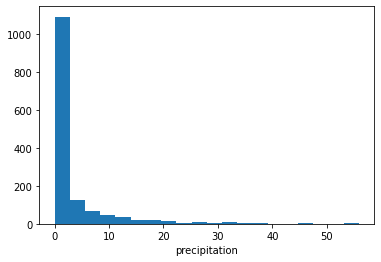

In [22]:
plt.hist(new_df.precipitation,bins=20)
plt.xlabel("precipitation")
plt.show()

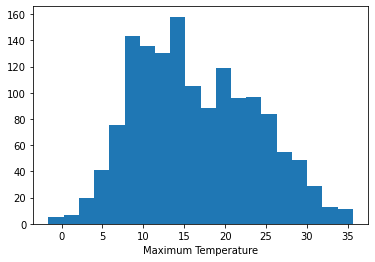

In [23]:
plt.hist(new_df.temp_max,bins=20)
plt.xlabel("Maximum Temperature")
plt.show()

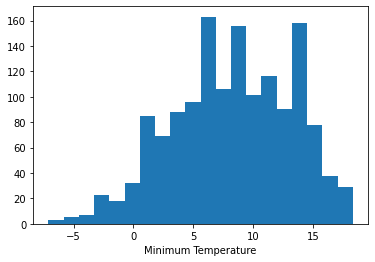

In [24]:
plt.hist(new_df.temp_min,bins=20)
plt.xlabel("Minimum Temperature")
plt.show()

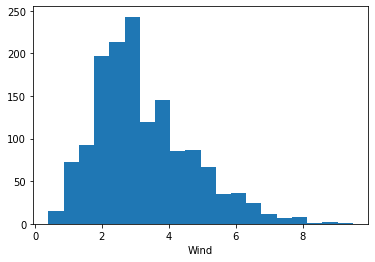

In [25]:
plt.hist(new_df.wind,bins=20)
plt.xlabel("Wind")
plt.show()

### Skewness of the each parameters

In [26]:
new_df.skew()

precipitation    3.505644
temp_max         0.280930
temp_min        -0.249459
wind             0.891668
weather         -0.274739
dtype: float64

The precipition parameters is more skewed.

In [27]:
# Reducing the skewness of precipatation using square root
new_df.precipitation=np.sqrt(new_df.precipitation)

In [28]:
new_df.skew()

precipitation    1.607082
temp_max         0.280930
temp_min        -0.249459
wind             0.891668
weather         -0.274739
dtype: float64

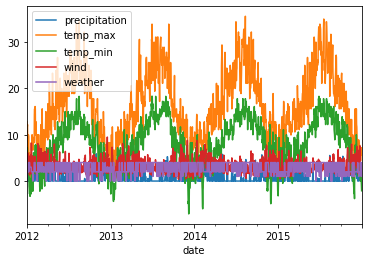

In [29]:
# Visualizing the whole parameters of the data
new_df.plot()

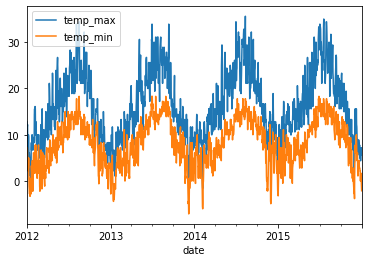

In [30]:
new_df[["temp_max","temp_min"]].plot()

In [31]:
corr = new_df.corr()
corr

precipitation  temp_max  temp_min      wind   weather
precipitation       1.000000 -0.336841 -0.127578  0.370432 -0.392285
temp_max           -0.336841  1.000000  0.875687 -0.164857  0.322337
temp_min           -0.127578  0.875687  1.000000 -0.074185  0.154981
wind                0.370432 -0.164857 -0.074185  1.000000 -0.065858
weather            -0.392285  0.322337  0.154981 -0.065858  1.000000

The correlation of the weather (target) paramter has highest correlation with maximum temperature which is of 0.322 among other features followed by temperature minimum.

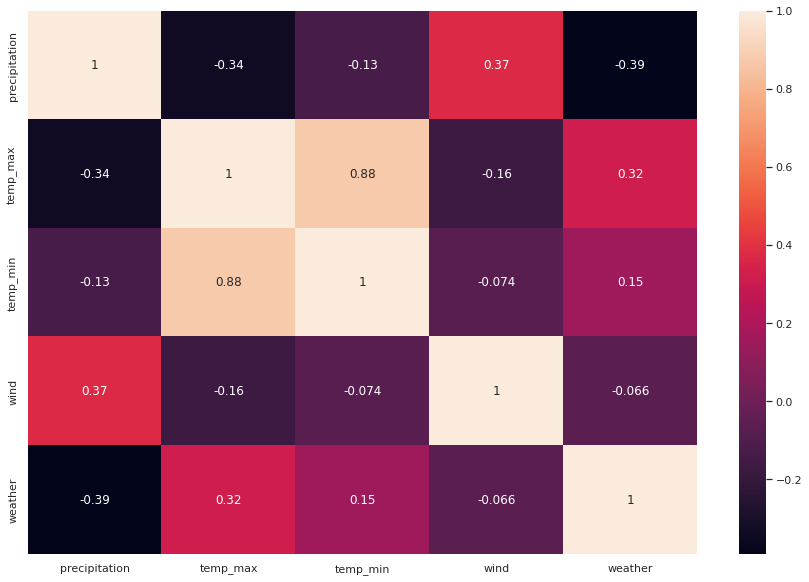

In [32]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data= corr,annot=True)
plt.show()

### Check for Outliers

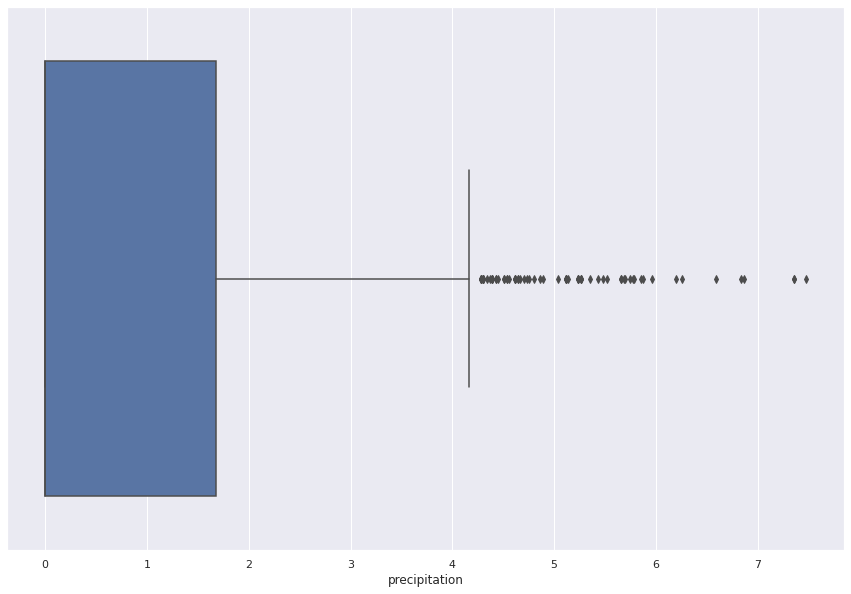

In [33]:
# Outliers in precipitation
sns.boxplot(x=new_df['precipitation'])

Indeed, there are few outliers in precipitation and we will remove using inter quantile range.

### Removing outliers using IQR for precipitation

In [34]:
Q1 = new_df.precipitation.quantile(0.25)
Q3 = new_df.precipitation.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)
print(upperlimit,lowerlimit)

4.183300132670378 -2.5099800796022267


In [35]:
new_df[(new_df.precipitation < lowerlimit)  | (new_df.precipitation > upperlimit)]

precipitation  temp_max  temp_min  wind  weather
date                                                        
2012-01-04       4.505552      12.2       5.6   4.7        2
2012-01-18       4.449719       0.0      -2.8   5.0        3
2012-01-29       5.263079       9.4       3.9   4.5        2
2012-03-12       4.393177       8.3       0.6   6.2        3
2012-03-15       4.888763      11.1       5.6   5.8        3
...                   ...       ...       ...   ...      ...
2015-12-07       5.234501      11.1       8.3   3.4        2
2015-12-08       7.355270      15.6      10.0   6.2        2
2015-12-17       4.669047       6.7       3.9   6.0        2
2015-12-18       4.301163       8.9       4.4   5.1        2
2015-12-21       5.234501       5.6       2.8   4.3        2

[69 rows x 5 columns]

In [36]:
newdf = new_df[(new_df.precipitation > lowerlimit) & (new_df.precipitation < upperlimit)]
newdf.shape

(1392, 5)

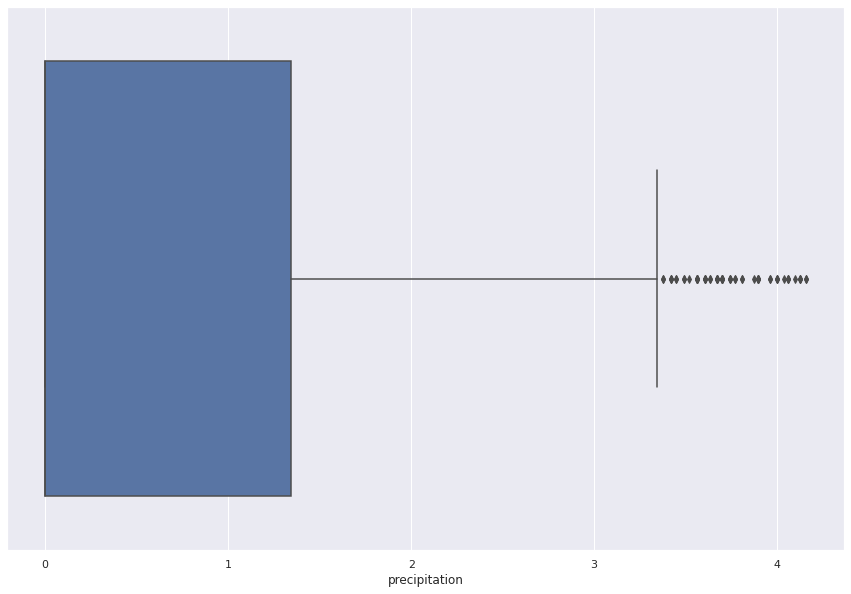

In [37]:
sns.boxplot(x=newdf['precipitation'])

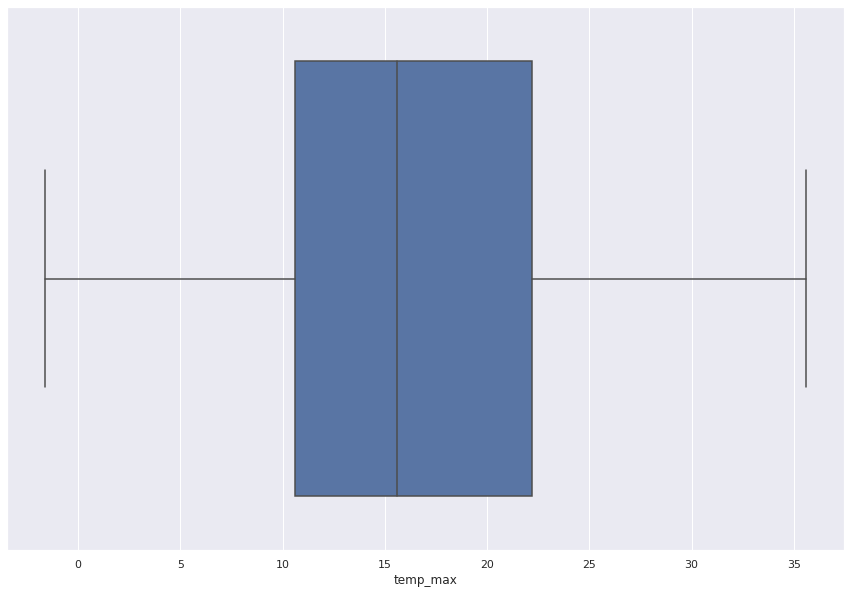

In [38]:
# Outliers in temp_max
sns.boxplot(x=new_df['temp_max'])

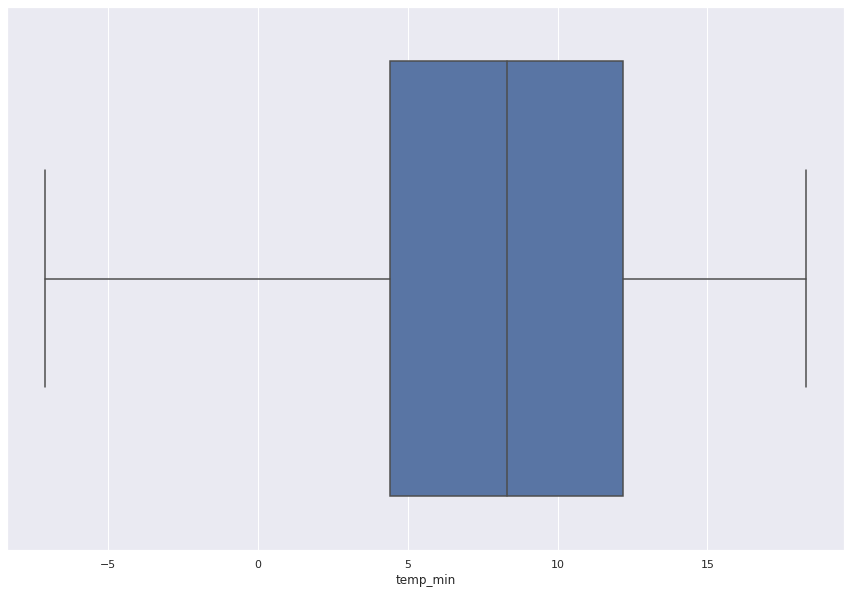

In [39]:
# Outliers in temp_min
sns.boxplot(x=new_df['temp_min'])

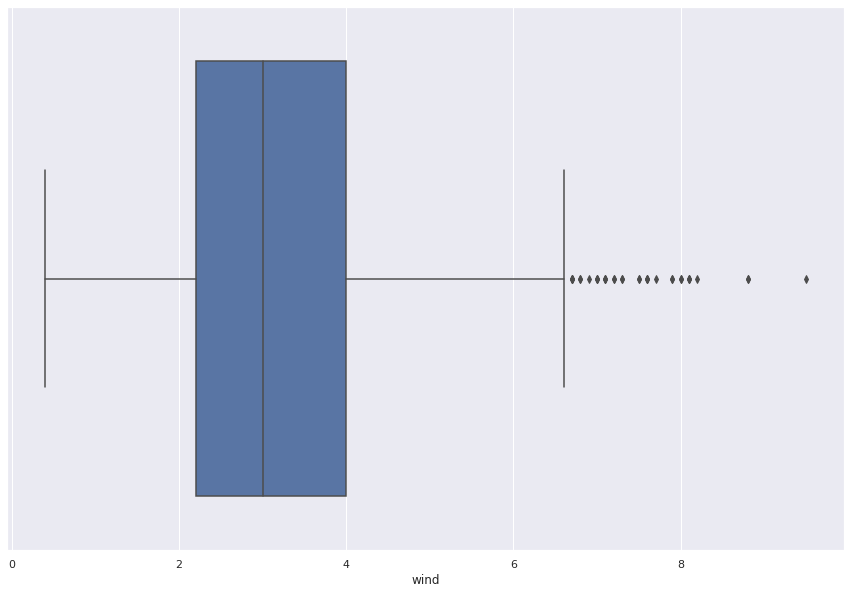

In [40]:
# Outliers in wind
sns.boxplot(x=new_df['wind'])

### Removing outliners using IQR for wind

In [41]:
Q1 = new_df.wind.quantile(0.25)
Q3 = new_df.wind.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)
print(upperlimit,lowerlimit)

6.699999999999999 -0.49999999999999956


In [42]:
new_df[(new_df.wind < lowerlimit)  | (new_df.wind > upperlimit)]

precipitation  temp_max  temp_min  wind  weather
date                                                        
2012-01-21       1.732051       8.3       3.3   8.2        2
2012-02-18       2.529822       6.7       3.9   8.1        2
2012-02-21       0.894427      10.0       7.8   7.5        2
2012-02-29       0.894427       5.0       1.1   7.0        3
2012-03-03       0.000000      12.2       6.7   7.0        4
2012-04-01       1.224745       8.9       4.4   6.8        2
2012-04-30       2.073644      12.8       7.2   8.0        2
2012-10-03       0.000000      18.9       7.8   7.3        4
2012-12-17       1.414214       8.3       1.7   9.5        2
2013-01-07       1.516575      10.0       4.4   7.3        2
2013-02-22       3.065942       7.8       3.9   8.1        2
2013-02-25       1.516575      10.6       3.3   7.1        2
2013-03-20       3.146427      11.1       4.4   7.6        2
2013-09-29       4.098780      14.4      11.1   7.1        2
2013-11-02       3.563706      14.4       8.3   7.9        2
2013-11-07       5.477226      11.1      10.0   7.2        2
2013-12-01       1.732051      13.3       7.8   8.8        2
2014-01-10       2.073644      12.8       8.3   7.0        2
2014-01-11       4.615192      14.4       7.2   8.8        2
2014-01-12       1.224745      11.1       5.6   8.1        2
2014-01-13       0.000000      10.6      10.0   7.1        4
2014-02-16       5.138093       9.4       3.9   7.9        2
2014-02-20       1.732051      10.0       5.6   6.9        2
2014-11-06       2.024846      16.7      10.6   6.7        2
2014-11-11       0.000000       7.8       1.1   7.7        4
2014-11-12       0.000000       6.7       0.0   7.6        4
2014-12-10       3.605551      18.9      10.0   6.7        2
2015-09-20       2.024846      22.8      12.2   6.8        2
2015-10-30       4.393177      17.2      11.7   6.7        2
2015-10-31       5.744563      15.6      11.7   7.2        2
2015-11-17       5.431390      13.3       6.7   8.0        2
2015-12-10       3.065942      11.7       6.1   7.5        2
2015-12-20       2.073644       7.8       4.4   6.7        2
2015-12-23       2.469818       5.0       2.8   7.6        2

In [43]:
newdf = new_df[(new_df.wind > lowerlimit) & (new_df.wind < upperlimit)]
newdf.shape

(1427, 5)

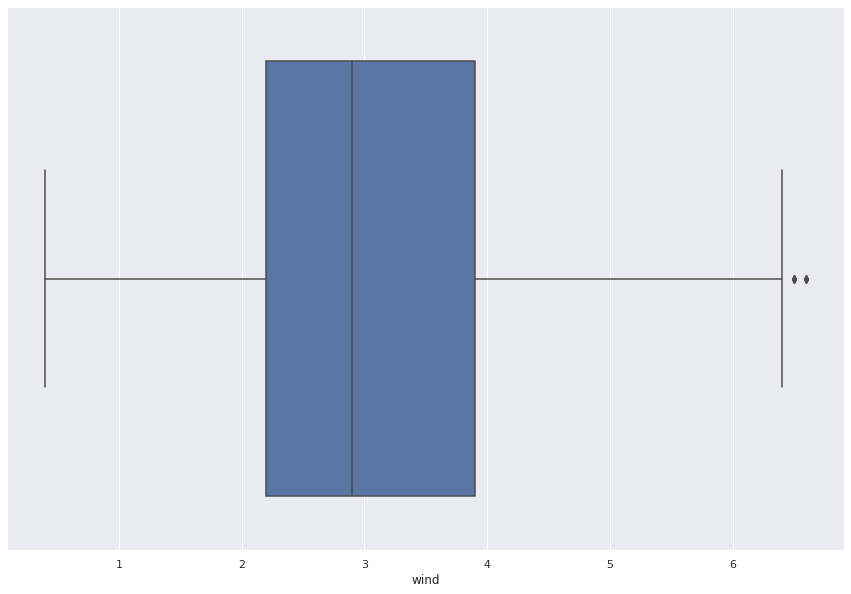

In [44]:
sns.boxplot(x=newdf['wind'])

## 5. Split data for training and testing

In [45]:
# separate data into X features and Y target
#X = new_df.drop(columns=["weather"])
X = newdf.iloc[:,:-1]
X
y = newdf.iloc[:,-1]

In [46]:
# separate data into X features and Y target
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.25, random_state = 5)

### Features scaling

In [47]:
#from sklearn.preprocessing import StandardScaler 
#sc = StandardScaler()
#x_train = sc.fit_transform(xtrain)
#x_test = sc.fit_transform(xtest)

## 5.1 Train the data using Random Forest

In [48]:
# fit a Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [49]:
RF = RandomForestClassifier(n_estimators= 50,min_samples_leaf=2)
RF.fit(xtrain, ytrain)

RandomForestClassifier(min_samples_leaf=2, n_estimators=50)

In [50]:
RF.score(xtrain, ytrain)

0.9112149532710281

In [51]:
#
#RF.score(xtest, ytest)
acc2 = RF.score(xtest,ytest)
print(acc2)

0.8907563025210085


In [52]:
ypred = RF.predict(xtest)

In [53]:
# Validation of the model
test = [0,15,-8,2]
y_hat = RF.predict(np.reshape(test,(1, -1)))
ladel_encoding.inverse_transform(y_hat)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['sun'], dtype=object)

In [54]:
# calculate mean squared error (MSE)
from sklearn.metrics import mean_squared_error
RF_mse = (mean_squared_error(ytest, ypred))
print("Random Forest MSE: {}".format(RF_mse))

Random Forest MSE: 0.8711484593837535


In [55]:
# calculate root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error

RF_mse = mean_squared_error(ytest, ypred)
RF_rmse = np.sqrt(RF_mse)
print("Random Forest RMSE: {}".format(RF_rmse))

Random Forest RMSE: 0.933353341122082


In [56]:
# calculate mean absoulte error (MAE)
from sklearn.metrics import mean_absolute_error
RF_mae = mean_absolute_error(ytest, ypred)
print("Random Forest MAE: {}".format(RF_mae))

Random Forest MAE: 0.29411764705882354


In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,  accuracy_score
print( confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))
print(accuracy_score(ytest, ypred))

[[  1   0   0   0   6]
 [  1   1   1   0  17]
 [  0   0 164   1   6]
 [  0   0   1   3   0]
 [  0   2   4   0 149]]
              precision    recall  f1-score   support

           0       0.50      0.14      0.22         7
           1       0.33      0.05      0.09        20
           2       0.96      0.96      0.96       171
           3       0.75      0.75      0.75         4
           4       0.84      0.96      0.89       155

    accuracy                           0.89       357
   macro avg       0.68      0.57      0.58       357
weighted avg       0.86      0.89      0.87       357

0.8907563025210085


## 5.2 Train the data using Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
Logre = LogisticRegression(random_state=5)
Logre

LogisticRegression(random_state=5)

In [60]:
Logre.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=5)

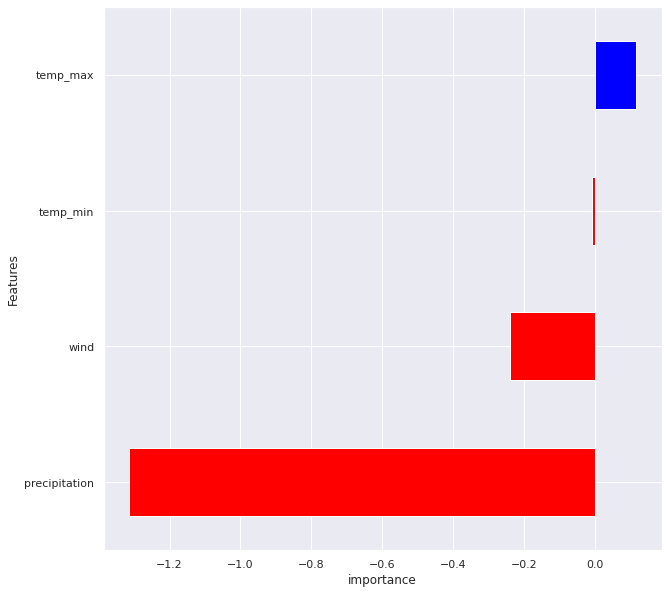

In [61]:
# Check which parameters has more influnece on weather (target)
coeff = list(Logre.coef_[0])
labels = list(X)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by = ['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind = 'barh', figsize=(10, 10), color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('importance')
plt.show()

Hence, the temp_max has more influence in weather conditions.

### Prediction

In [62]:
#make prediction for new unseen data
#Logre.predict(x_test)
y_predict = Logre.predict(xtest)
y_predict

array([4, 2, 2, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4,
       4, 2, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4,
       2, 4, 4, 4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 4,
       2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2,
       2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 4, 2,
       4, 2, 4, 4, 4, 4, 2, 3, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 2,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 4, 2, 4, 4, 4, 2,
       2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2,
       2, 4, 3, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4,
       4, 2, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4,
       2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2,
       4, 2, 2, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2,

In [63]:
ytest

date
2012-02-05    4
2014-03-25    2
2013-01-31    2
2015-09-03    4
2014-11-30    4
             ..
2014-11-05    2
2014-12-22    4
2015-01-18    2
2012-08-02    4
2014-03-16    2
Name: weather, Length: 357, dtype: int64

In [64]:
Logre.predict_proba(xtest),

(array([[6.52562044e-02, 9.49513664e-02, 3.34316718e-02, 6.23167431e-05,
         8.06298441e-01],
        [3.46186925e-05, 2.23829798e-05, 9.98347759e-01, 1.59368202e-03,
         1.55759549e-06],
        [7.67509747e-05, 6.16170899e-05, 9.92724804e-01, 7.13296497e-03,
         3.86289781e-06],
        ...,
        [8.09486938e-11, 1.45519710e-11, 9.91685344e-01, 8.31465623e-03,
         4.90105945e-15],
        [5.55800761e-02, 1.11007334e-01, 5.25945798e-02, 7.10647692e-08,
         7.80817939e-01],
        [8.68277691e-12, 7.96980030e-13, 9.27885739e-01, 7.21142605e-02,
         2.17702897e-17]]),)

In [65]:
Logre.coef_

array([[-1.31415491,  0.11626654, -0.00740401, -0.24068143],
       [-1.88385706,  0.10321232,  0.0374481 , -0.16190695],
       [ 3.40807733, -0.01736488,  0.18162174,  0.0468921 ],
       [ 3.98830009, -0.43617679, -0.12660145,  0.1877112 ],
       [-4.19836545,  0.23406281, -0.08506439,  0.16798508]])

In [66]:
Logre.intercept_

array([ 0.04115548,  0.29295825,  0.07450781, -0.2734315 , -0.13519004])

### Accuracy

In [67]:
#accuracy score for training set
#Logre.score(x_train,y_train)
print("The score of training data: {}".format(Logre.score(xtrain, ytrain)))

The score of training data: 0.8289719626168224


In [68]:
# Accuracy score for test set
# Logre.score(x_test,y_test)
#print("The score or accuracy of test data: {}".format(Logre.score(xtest,ytest)))
acc1 = Logre.score(xtest,ytest)
print(acc1)

0.8935574229691877


In [69]:
# predicted value for test data
prediction = Logre.predict(xtest)

In [70]:
## Validation of the model giving the input
test = [0,0,-5,64] 
y_hat = Logre.predict(np.reshape(test,(1,-1)))
ladel_encoding.inverse_transform(y_hat)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array(['snow'], dtype=object)

In [71]:
# Finding model accuracy using accuracy score from sklearn.metrics
from sklearn.metrics import accuracy_score
#accuracy_score(ytest,prediction)
print("The score accuracy of ytest and prediction: {}".format(accuracy_score(ytest,prediction)))

The score accuracy of ytest and prediction: 0.8935574229691877


In [72]:
pd.DataFrame({'actual': ytest, 
              'prediction': prediction,
              'diff':(ytest - prediction)})

actual  prediction  diff
date                                
2012-02-05       4           4     0
2014-03-25       2           2     0
2013-01-31       2           2     0
2015-09-03       4           4     0
2014-11-30       4           4     0
...            ...         ...   ...
2014-11-05       2           2     0
2014-12-22       4           4     0
2015-01-18       2           2     0
2012-08-02       4           4     0
2014-03-16       2           2     0

[357 rows x 3 columns]

In [73]:
#  calculate mean squared error (MSE)
from sklearn.metrics import mean_squared_error
logre_mse = (mean_squared_error(ytest, prediction))
print("Logistic Regression MSE: {}".format(logre_mse))


Logistic Regression MSE: 0.8991596638655462


In [74]:
# calculate root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error
logre_mse = mean_squared_error(ytest, prediction)
logre_rmse = np.sqrt(logre_mse)
print("Logistic Regression RMSE: {}".format(logre_rmse))

Logistic Regression RMSE: 0.9482402985876239


In [75]:
# calculate mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error
logre_mae = mean_absolute_error(ytest, prediction)
print("Logistic Regression MAE: {}".format(logre_mae))


Logistic Regression MAE: 0.29411764705882354


In [76]:
# Display confusion matrix
# Helps to see how model performs
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,y_predict)

array([[  0,   0,   0,   0,   7],
       [  0,   0,   0,   0,  20],
       [  0,   0, 164,   1,   6],
       [  0,   0,   3,   1,   0],
       [  0,   0,   0,   1, 154]])

### Save the model

In [77]:
import pickle

In [78]:
# Save the model
with open('saved_model.pkl', "wb") as f:
    pickle.dump(Logre, f)

In [79]:
# Open the model
with open('saved_model.pkl', "rb") as f:
    mp = pickle.load(f)

### 5.3 Train the data using KNN (K Nearest Neighbors)

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score  # Model Evaluation

# Making the model using KNeighborsClassifier()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [81]:
# Fiting the training data in the model
knn.fit(xtrain,ytrain)
#print("Training completed.")

KNeighborsClassifier()

In [82]:
# Accuracy score for train set
print("The score of training data: {}".format(knn.score(xtrain, ytrain)))

The score of training data: 0.8205607476635514


In [83]:
# Accuracy score for test set
acc3 = knn.score(xtest,ytest)
print(acc3)

0.7675070028011205


In [84]:
# Making predictions using the predict() and xtest data
predict = knn.predict(xtest)

In [85]:
## Validation of the model giving the input
test = [0,0,-8,50]
y_hat = Logre.predict(np.reshape(test,(1,-1)))
ladel_encoding.inverse_transform(y_hat)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array(['snow'], dtype=object)

In [86]:
# Finding model accuracy using accuracy score from sklearn.metrics
from sklearn.metrics import accuracy_score
print("The score accuracy of ytest and prediction: {}".format(accuracy_score(ytest,predict)))

The score accuracy of ytest and prediction: 0.7675070028011205


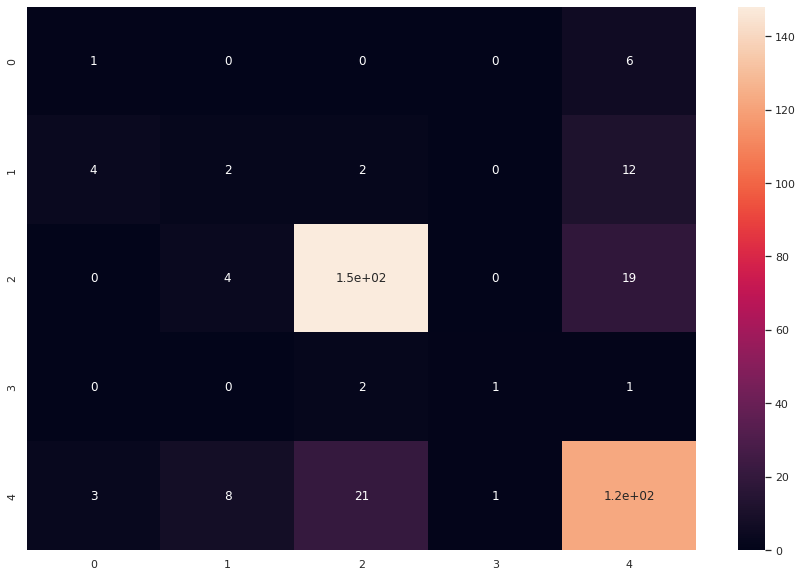

In [87]:
# Confusion matrix for KNN
 
cm = confusion_matrix(ytest, predict)
sns.heatmap(cm,annot=True)
plt.show()

In [88]:
#  calculate rmean squared error (MSE)
from sklearn.metrics import mean_squared_error
knn_mse = (mean_squared_error(ytest, predict))
print("K Nearest Neighbors MSE: {}".format(knn_mse))

K Nearest Neighbors MSE: 1.3949579831932772


In [89]:
# calculate root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error
knn_mse = mean_squared_error(ytest, predict)
knn_rmse = np.sqrt(knn_mse)
print("K Nearest Neighbors RMSE: {}".format(knn_rmse))

K Nearest Neighbors RMSE: 1.1810833938352012


In [90]:
# calculate mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error
knn_mae = mean_absolute_error(ytest, predict)
print("K Nearest Neighbors MAE: {}".format(knn_mae))

K Nearest Neighbors MAE: 0.5322128851540616


### Visualizing the accuracy of different classifications method used

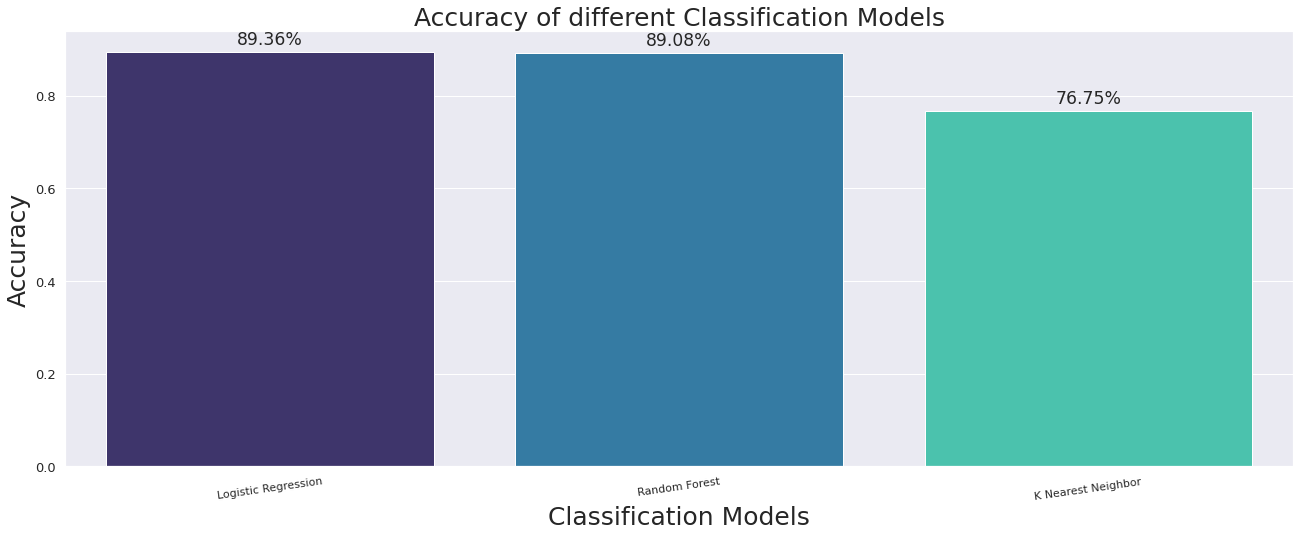

In [91]:
mylist=[]
mylist2=[]
mylist.append(acc1)
mylist2.append("Logistic Regression",)
mylist.append(acc2)
mylist2.append("Random Forest")
mylist.append(acc3)
mylist2.append("K Nearest Neighbor")
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
plt.figure(figsize=(22,8))
ax = sns.barplot(x=mylist2, y=mylist, palette = "mako", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 25 )
plt.ylabel("Accuracy", fontsize = 25)
plt.title("Accuracy of different Classification Models", fontsize = 25)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

We can conclude that the Logistic regression gives more accurate prediction with the accuracy score of 89.3 % 
compared to Random forest model with 87.6 % and KNN model with 76.76%. Thus, Logistic regression model will be used to predict the weather.

In [92]:

# combine all models' results into one dataframe
data = {"Model": ["Logistic Regression", "Random Forest", "K Nearest Neighbor"], 
        "MSE": [logre_mse, RF_mse, knn_mse],         
        "RMSE": [logre_rmse, RF_rmse, knn_rmse],
        "MAE": [logre_mae, RF_mae, knn_mae]}

results = pd.DataFrame(data=data)
results



Model       MSE      RMSE       MAE
0  Logistic Regression  0.899160  0.948240  0.294118
1        Random Forest  0.871148  0.933353  0.294118
2   K Nearest Neighbor  1.394958  1.181083  0.532213

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


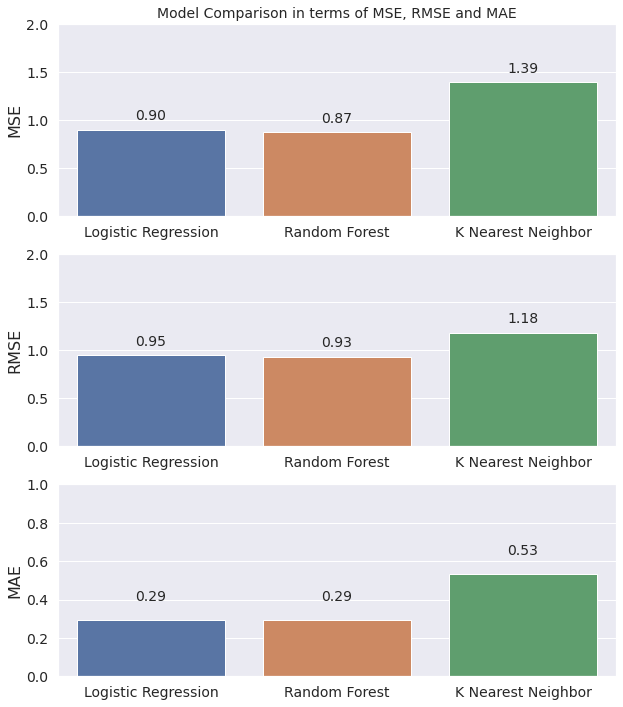

In [93]:
# visualize the results using bar charts
# sns.set(rc={"figure.figsize":(10, 12)})
plt.rcParams["axes.labelsize"] = 16
plt.figure(figsize=(10, 12))

plt.subplot(3, 1, 1)
plt.title("Model Comparison in terms of MSE, RMSE and MAE", fontsize=14)
g1 = sns.barplot(x="Model", y="MSE", data=results)
plt.ylim(0, 2)
g1.set_xlabel("")
g1.tick_params(labelsize=14)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.1, "{:1.2f}".format(height), ha="center", fontsize=14)
    plt.subplot(3, 1, 2)
g2 = sns.barplot(x  ="Model", y ="RMSE", data=results)
plt.ylim(0,2)
g2.set_xlabel("")
g2.tick_params(labelsize=14)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.1, "{:1.2f}".format(height), ha="center", fontsize=14) 

plt.subplot(3, 1, 3)
g3 = sns.barplot(x="Model", y="MAE", data=results)
plt.ylim(0, 1)
g3.set_xlabel("")
g3.tick_params(labelsize=14)
for p in g3.patches:
    height = p.get_height()
    g3.text(p.get_x()+p.get_width()/2., height+0.1, "{:1.2f}".format(height), ha="center", fontsize=14) 
    